In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import re
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

from PIL import Image

In [3]:
img_path = "/content/drive/MyDrive/ThiGiacMay/btl/test/cropped_images_test/"

In [4]:
img_dir = os.listdir(img_path)

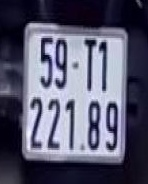

original_0331_05809_b_jpg.rf.a81426e1376919cd92a0831074421151_cropped_0.jpg


In [5]:
img = cv2.imread(os.path.join(img_path, img_dir[0]))
cv2_imshow(img)
print(img_dir[0])

In [6]:
img.shape

(184, 148, 3)

# Tiền xử lý ảnh

## Xử lý sample


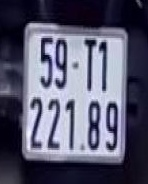

In [7]:
# Giả sử img_path là thư mục chứa ảnh
img_dir = os.listdir(img_path)

# Duyệt qua tất cả các ảnh trong thư mục
for img_name in img_dir:
    if "original" in img_name:  # Kiểm tra xem tên file có chứa chữ "original"
        # Đọc ảnh
        img_original = cv2.imread(os.path.join(img_path, img_name))
        # Hiển thị ảnh
        cv2_imshow(img_original)
        break

### Blur

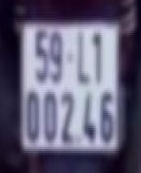

In [8]:
# Giả sử img_path là thư mục chứa ảnh
img_dir = os.listdir(img_path)

# Duyệt qua tất cả các ảnh trong thư mục
for img_name in img_dir:
    if "blur" in img_name:  # Kiểm tra xem tên file có chứa chữ "blur"
        # Đọc ảnh
        img_blur = cv2.imread(os.path.join(img_path, img_name))
        # Hiển thị ảnh
        cv2_imshow(img_blur)
        break

In [9]:
def check_sharpness(image):
    # Tính gradient của ảnh sử dụng Sobel filter
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(sobelx**2 + sobely**2)  # Tính độ lớn gradient

    # Tính độ tương phản (biến thiên gradient)
    sharpness = np.mean(magnitude)
    return sharpness

def sharpen_image(image):
    # Bộ lọc làm nét (sharpening kernel)
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])

    # Áp dụng bộ lọc sharpening
    sharpened_img = cv2.filter2D(image, -1, kernel)
    return sharpened_img

Độ tương phản của ảnh: 56.65175827382201
Ảnh mờ, cần làm sắc nét.


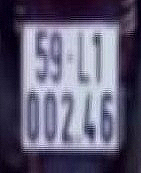

In [10]:
sharpness_value = check_sharpness(img_blur)
print("Độ tương phản của ảnh:", sharpness_value)
if sharpness_value < 70:
    print("Ảnh mờ, cần làm sắc nét.")
    sharpened_img = sharpen_image(img_blur)
    cv2_imshow(sharpened_img)
else:
    print("Ảnh sắc nét.")

In [11]:
# Kiểm tra hàm với ảnh original
sharpness_value = check_sharpness(img_original)
print("Độ tương phản của ảnh:", sharpness_value)
if sharpness_value < 70:
    print("Ảnh mờ, cần làm sắc nét.")
    sharpened_img = sharpen_image(img_original)
    cv2_imshow(sharpened_img)
else:
    print("Ảnh sắc nét.")

Độ tương phản của ảnh: 99.83931869047417
Ảnh sắc nét.


### Nhiễu

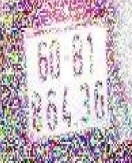

In [12]:
# Duyệt qua tất cả các ảnh trong thư mục
for img_name in img_dir:
    if "noisy" in img_name:  # Kiểm tra xem tên file có chứa chữ "noisy"
        # Đọc ảnh
        img_noisy = cv2.imread(os.path.join(img_path, img_name))
        # Hiển thị ảnh
        cv2_imshow(img_noisy)
        break

In [13]:
def check_noise(image):
    # Sử dụng Laplacian để phát hiện nhiễu
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    variance = laplacian.var()  # Đo độ biến thiên của Laplacian
    return variance

def denoise_gaussian(image):
    # Áp dụng bộ lọc Gaussian để loại bỏ nhiễu
    denoised_img = cv2.GaussianBlur(image, (5, 5), 0)
    return denoised_img

Độ nhiễu của ảnh: 9496.591328333763
Ảnh có nhiễu, cần giảm nhiễu. sau đó làm nhiễu


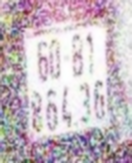

In [14]:
noise_value = check_noise(img_noisy)
print("Độ nhiễu của ảnh:", noise_value)
if noise_value > 1000:
    print("Ảnh có nhiễu, cần giảm nhiễu. sau đó làm nhiễu")
    img_denoised = denoise_gaussian(img_noisy)
    cv2_imshow(img_denoised)
else:
    print("Ảnh ít nhiễu.")

In [15]:
noise_value = check_noise(img_denoised)
print("Độ nhiễu của ảnh:", noise_value)
if noise_value > 1000:
    print("Ảnh có nhiễu, cần giảm nhiễu.")
else:
    print("Ảnh ít nhiễu.")

Độ nhiễu của ảnh: 298.1454454375925
Ảnh ít nhiễu.


In [16]:
# kiểm tra hàm với ảnh thường
noise_value = check_noise(img_original)
print("Độ nhiễu của ảnh:", noise_value)
if noise_value > 1000:
    print("Ảnh có nhiễu, cần giảm nhiễu.")
else:
    print("Ảnh ít nhiễu.")

Độ nhiễu của ảnh: 651.0431893683461
Ảnh ít nhiễu.


### Xoay

In [17]:
# kiểm tra độ xoay
def angle_of_rotation(image):
    # Bước 1: Đọc ảnh và chuyển sang ảnh xám
    img = image.copy()
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Bước 2: Áp dụng edge detection (Canny)
    edges = cv2.Canny(gray_img, 50, 150, apertureSize=3)

    # Bước 3: Áp dụng phép biến đổi Hough để phát hiện đường thẳng
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 90)  # ngưỡng: 100

    # Kiểm tra nếu có các đường thẳng phát hiện được
    if lines is not None:
    #     # Vẽ các đường thẳng phát hiện được
    #     for rho, theta in lines[:, 0]:
    #         a = np.cos(theta)
    #         b = np.sin(theta)
    #         x0 = a * rho
    #         y0 = b * rho
    #         x1 = int(x0 + 1000 * (-b))
    #         y1 = int(y0 + 1000 * (a))
    #         x2 = int(x0 - 1000 * (-b))
    #         y2 = int(y0 - 1000 * (a))
    #         cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Lấy góc của các đường thẳng
        angles = []
        for rho, theta in lines[:, 0]:
            angle = np.degrees(theta)  # Chuyển đổi từ radians sang độ
            angles.append(angle)
            # Điều chỉnh góc nếu nó lớn hơn 90 độ
            if angle > 90:
                angle -= 180
            angles.append(angle)
        # Tính góc trung bình của tất cả các đường thẳng
        mean_angle = np.mean(angles)

        # # Hiển thị ảnh với các đường thẳng
        # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        # plt.axis('off')
        # plt.show()

        return mean_angle
    else:
        print("Không phát hiện được đường thẳng.")
        return None

def rotate_image_to_horizontal(image, angle = 0):
    # Lấy kích thước của ảnh
    (h, w) = image.shape[:2]

    # Tính toán trung tâm ảnh
    center = (w // 2, h // 2)


    # Tạo ma trận xoay
    rotation_matrix = cv2.getRotationMatrix2D(center, -angle, 1.0)

    # Xoay ảnh với ma trận và giữ lại toàn bộ ảnh sau khi xoay
    rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))

    return rotated_image

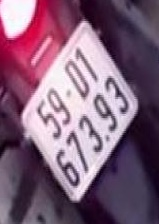

In [18]:
# Duyệt qua tất cả các ảnh trong thư mục
for img_name in img_dir:
    if "rota" in img_name:  # Kiểm tra xem tên file có chứa chữ "rota"
        # Đọc ảnh
        img_rota = cv2.imread(os.path.join(img_path, img_name))
        # Hiển thị ảnh
        cv2_imshow(img_rota)
        break

Góc xoay: 33.0 độ
Ảnh cần xoay


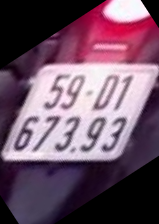

In [19]:
# Lấy góc xoay
angle = angle_of_rotation(img_rota)
print(f"Góc xoay: {angle} độ")
if angle != None:
    print("Ảnh cần xoay")
    rotated_img = rotate_image_to_horizontal(img_rota, 90-angle)
    cv2_imshow(rotated_img)
else:
    print("Ảnh không cần xoay")

Góc xoay: 0.9999999403953552 độ
Ảnh cần xoay


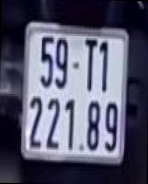

In [20]:
# Lấy góc xoay
angle = angle_of_rotation(img_original)
print(f"Góc xoay: {angle} độ")
if angle != None:
    print("Ảnh cần xoay")
    rotated_img = rotate_image_to_horizontal(img_original, angle)
    cv2_imshow(rotated_img)
else:
    print("Ảnh không cần xoay")

### ảnh lật

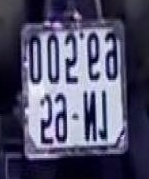

In [21]:
# Duyệt qua tất cả các ảnh trong thư mục
for img_name in img_dir:
    if "flip" in img_name:  # Kiểm tra xem tên file có chứa chữ "flip"
        # Đọc ảnh
        img_flip = cv2.imread(os.path.join(img_path, img_name))
        # Hiển thị ảnh
        cv2_imshow(img_flip)
        break

In [22]:
# Lấy góc xoay
angle = angle_of_rotation(img_flip)
print(f"Góc xoay: {angle} độ")
if angle != None:
    print("Ảnh cần xoay")
    rotated_img = rotate_image_to_horizontal(img_flip, angle)
    cv2_imshow(rotated_img)
else:
    print("Ảnh không cần xoay")

Không phát hiện được đường thẳng.
Góc xoay: None độ
Ảnh không cần xoay


In [23]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [24]:
import easyocr
import cv2
import numpy as np

# Hàm kiểm tra hướng văn bản trong ảnh và lật lại nếu cần
def check_if_flipped(image):
    reader = easyocr.Reader(['en'])  # Khởi tạo trình đọc OCR với ngôn ngữ tiếng Anh
    result = reader.readtext(image)  # Nhận diện văn bản trong ảnh
    # In ra văn bản và các thông tin khác
    for (bbox, text, prob) in result:
        print(f"Văn bản: {text}")
        print(f"Độ tin cậy: {prob}")
        print(f"Vị trí bounding box: {bbox}")
    # Nếu có văn bản, chúng ta lấy góc của văn bản
    if result:
        # Duyệt qua tất cả các văn bản được phát hiện
        for (bbox, text, prob) in result:
            # Tính toán góc từ bounding box của văn bản
            # Bbox là một danh sách các tọa độ của các điểm bao quanh văn bản
            angle = np.arctan2(bbox[2][1] - bbox[0][1], bbox[2][0] - bbox[0][0])
            angle_deg = np.degrees(angle)
            print(f"Góc của văn bản: {angle_deg} độ")

            # Kiểm tra nếu góc lớn hơn 90 độ, có thể ảnh bị lật
            if abs(angle_deg) > 45:
                print("Ảnh có thể bị lật.")
                return True  # Ảnh có thể bị lật
        return False  # Ảnh không bị lật
    else:
        print("Không phát hiện văn bản.")
        return False

# Hàm lật ảnh
def rotate_image(image, angle=0):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))
    return rotated_image

In [25]:
# Kiểm tra nếu ảnh bị lật và lật lại nếu cần
if check_if_flipped(img_flip):
    rotated_image = rotate_image(img_flip, 180)  # Lật lại ảnh nếu bị lật
    cv2.imshow("Flipped Image", rotated_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Ảnh không cần lật.")

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteVăn bản: '00? Qa
Độ tin cậy: 0.026981083441535034
Vị trí bounding box: [[np.int32(18), np.int32(22)], [np.int32(132), np.int32(22)], [np.int32(132), np.int32(94)], [np.int32(18), np.int32(94)]]
Văn bản: 28 U
Độ tin cậy: 0.12404901534318924
Vị trí bounding box: [[np.int32(31), np.int32(87)], [np.int32(117), np.int32(87)], [np.int32(117), np.int32(151)], [np.int32(31), np.int32(151)]]
Góc của văn bản: 32.27564431457763 độ
Góc của văn bản: 36.656108415966905 độ
Ảnh không cần lật.


### ảnh sáng (độ sáng cao hoặc tối)

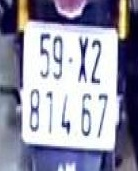

In [26]:
# Duyệt qua tất cả các ảnh trong thư mục
for img_name in img_dir:
    if "contrasted" in img_name:  # Kiểm tra xem tên file có chứa chữ "contrasted"
        # Đọc ảnh
        img_contrasted = cv2.imread(os.path.join(img_path, img_name))
        # Hiển thị ảnh
        cv2_imshow(img_contrasted)
        break

In [27]:
def check_brightness(image):
    # Tính giá trị trung bình của ảnh
    brightness = np.mean(image)
    return brightness

def apply_clahe(image):
    # Chuyển ảnh sang xám nếu là ảnh màu
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Khởi tạo CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))  # Bạn có thể điều chỉnh clipLimit và tileGridSize
    clahe_img = clahe.apply(gray)

    return clahe_img

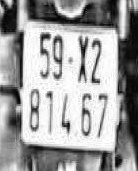

In [28]:
brightness_value = apply_clahe(img_contrasted)
cv2_imshow(brightness_value)

In [29]:
brightness_value = check_brightness(img_original)
print(brightness_value)
if brightness_value < 50:
    print("Ảnh quá tối, cần phải làm sáng.")
elif brightness_value > 150:
    print("Ảnh quá sáng, cần điều chỉnh độ sáng.")
else:
    print("Độ sáng của ảnh hợp lý.")

95.6878794555425
Độ sáng của ảnh hợp lý.


## pipeline xử lý ảnh

In [30]:
def preprocess_image(image):
  sharpness_value = check_sharpness(image)
  noise_value = check_noise(image)
  brightness_value = check_brightness(image)
  angle = angle_of_rotation(image)

  if sharpness_value < 70:
    print("Ảnh mờ, cần làm sắc nét.")
    sharpened_img = sharpen_image(image)
  if noise_value > 1000:
    print("Ảnh có nhiễu, cần giảm nhiễu.")
    img_denoised = denoise_gaussian(image)
  if angle != None:
      print("Ảnh cần xoay")
      rotated_img = rotate_image_to_horizontal(image, 90-angle)

  image = apply_clahe(image) #có thể sử dụng cho mọi ảnh
  image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
  return image

Ảnh mờ, cần làm sắc nét.
Ảnh cần xoay


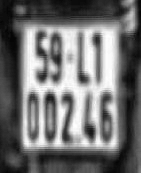

In [31]:
# thử với ảnh mờ
b = preprocess_image(img_blur)
cv2_imshow(b)

Không phát hiện được đường thẳng.
Ảnh có nhiễu, cần giảm nhiễu.


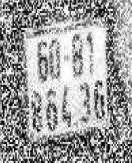

In [32]:
#Thử với ảnh nhiễu
n = preprocess_image(img_noisy)
cv2_imshow(n)

# Nhận diện ký tự

## model

In [132]:
import cv2
import numpy as np
import time
from tensorflow.keras.models import load_model
from skimage.filters import threshold_local
from skimage import measure
from google.colab.patches import cv2_imshow  # Nếu bạn sử dụng Google Colab

class LicensePlateRecognizer:
    def __init__(self, model, label_dict, target_size=(32, 32)):
        self.model = model
        self.label_dict = label_dict
        self.target_size = target_size

    def cropped_bolder(self, img, t):
        h, w = img.shape[:2]
        top_px = int(h * t)
        bottom_px = int(h * t)
        left_px = int(w * t)
        right_px = int(w * t)
        cropped = img[top_px:h - bottom_px, left_px:w - right_px]
        return cropped

    def convert_white_to_gray(self, img):
        # Đảm bảo ảnh có 1 kênh (grayscale)
        if len(img.shape) == 3:
            # Nếu ảnh là ảnh RGB, chuyển nó sang grayscale
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Thay thế pixel trắng (255) thành màu xám (128)
        # Tạo một bản sao của ảnh
        modified_img = np.copy(img)

        # Thay pixel trắng (255) thành xám (128)
        modified_img[modified_img == 255] = 128

        return modified_img

    def add_padding(self, image):
        h, w = image.shape[:2]
        target_h, target_w = self.target_size

        # Tính toán padding cần thiết
        pad_top = (target_h - h) // 2
        pad_bottom = target_h - h - pad_top
        pad_left = (target_w - w) // 2
        pad_right = target_w - w - pad_left

        # Thêm padding vào ảnh
        padded_image = cv2.copyMakeBorder(image, pad_top, pad_bottom, pad_left, pad_right, cv2.BORDER_CONSTANT, value=0)

        return padded_image

    def prepro_img_forcut(self, img):
        img = self.cropped_bolder(img, 0.17)
        V = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[2]
        T = threshold_local(V, 15, offset=10, method="gaussian")
        thresh = (V > T).astype("uint8") * 255
        thresh = cv2.bitwise_not(thresh)
        thresh = cv2.resize(thresh, (400, int(thresh.shape[0] * 400 / thresh.shape[1])))
        thresh = cv2.medianBlur(thresh, 5)
        return thresh

    def cut_label(self, img):
        candidates = []  # Chứa ảnh ký tự được cắt ra

        # xử lý ảnh
        thresh = self.prepro_img_forcut(img)

        # Làm sạch ảnh với morphological operations (ví dụ: Closing)
        kernel = np.ones((3, 3), np.uint8)
        thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

        # Phân tích thành phần liên kết, hàm measure.label()
        labels = measure.label(thresh, connectivity=2, background=0)

        bounding_boxes = []  # Danh sách các bounding box

        # Lặp qua các thành phần liên kết (labels)
        for label in np.unique(labels):
            if label == 0:  # Nếu là nền, bỏ qua
                continue

            # Tạo mặt nạ để lưu trữ vị trí của các ký tự
            mask = np.zeros(thresh.shape, dtype="uint8")
            mask[labels == label] = 255

            # Tìm các đường viền (contours) trong mặt nạ
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            if len(contours) > 0:
                contour = max(contours, key=cv2.contourArea)  # Chọn đường viền có diện tích lớn nhất
                (x, y, w, h) = cv2.boundingRect(contour)  # Lấy bounding box của ký tự

                # Các quy tắc để xác định ký tự hợp lệ
                aspectRatio = w / float(h)
                solidity = cv2.contourArea(contour) / float(w * h)
                heightRatio = h / float(img.shape[0])

                # Kiểm tra các quy tắc (tỷ lệ, độ đặc, chiều cao)
                if 0.1 < aspectRatio < 1.0 and solidity > 0.1 and 0.35 < heightRatio < 2.0:
                    # Cắt ký tự từ mặt nạ
                    candidate = np.array(mask[y:y + h, x:x + w])
                    candidate_resized = cv2.resize(candidate, (28, 28), cv2.INTER_AREA)
                    candidate_resized = candidate_resized.reshape((28, 28, 1))  # Đảm bảo ảnh có đúng 1 kênh
                    candidates.append((candidate_resized, (x, y)))  # Thêm (ảnh cắt, vị trí x, y)

                    # Thêm bounding box vào danh sách
                    bounding_boxes.append((x, y, w, h))

        # Chia ảnh thành 3 phần theo chiều dọc (top, middle, bottom)
        height = img.shape[0]
        top_threshold = height // 3
        bottom_threshold = 2 * height // 3

        top_row_boxes = [box for box in bounding_boxes if box[1] < top_threshold]
        middle_row_boxes = [box for box in bounding_boxes if top_threshold <= box[1] < bottom_threshold]
        bottom_row_boxes = [box for box in bounding_boxes if box[1] >= bottom_threshold]

        # Sắp xếp các bounding box trong mỗi phần theo tọa độ x (từ trái sang phải)
        top_row_boxes = sorted(top_row_boxes, key=lambda box: box[0])
        middle_row_boxes = sorted(middle_row_boxes, key=lambda box: box[0])
        bottom_row_boxes = sorted(bottom_row_boxes, key=lambda box: box[0])

        # Kết hợp các bounding box đã sắp xếp
        sorted_boxes = top_row_boxes + middle_row_boxes + bottom_row_boxes

        sorted_candidates = []
        for box in sorted_boxes:
            for i, (candidate, (x, y)) in enumerate(candidates):
                if (x, y) == (box[0], box[1]):
                    sorted_candidates.append(candidates[i])

        # Vẽ bounding box và đánh số thứ tự
        img_with_boxes = thresh.copy()
        for idx, (x, y, w, h) in enumerate(sorted_boxes):
            # Vẽ bounding box
            cv2.rectangle(img_with_boxes, (x, y), (x + w, y + h), (255, 0, 0), 2)

            # Đánh số thứ tự cho từng bounding box
            cv2.putText(img_with_boxes, str(idx + 1), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        cv2_imshow(img_with_boxes)

        return sorted_candidates

    def predict_cnn(self, candidates):
        end = ''
        for i, (char_image, _) in enumerate(candidates):
            # Dự đoán
            pre = self.model_cnn_predict_char(char_image)
            end += pre
            print(pre)
        return end

    def predict_tinycnn(self, candidates):
        end = ''
        for i, (char_image, _) in enumerate(candidates):
            # Tiền xử lý và dự đoán
            pre = self.model_tinycnn_predict_char(char_image)
            end += pre
            print(pre)
        return end

    def preprocess_image(self, img):
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (32, 32))  # Đổi kích thước ảnh
        img = img / 255.0  # Chuẩn hóa giá trị pixel
        if len(img.shape) == 2:  # Nếu ảnh là 2 chiều (height, width)
            img = np.expand_dims(img, axis=0)
        return img

    def model_cnn_predict_char(self, img):
        img = self.prepro_image_for_predict(img)
        pre = self.model.predict(np.expand_dims(img, axis=0))  # Dự đoán với ảnh đã thêm padding
        pre = np.argmax(pre, axis=1)[0]  # Lấy nhãn có xác suất cao nhất
        result = self.label_dict[pre]
        return result

    def prepro_image_for_predict(self, img):
        padded_image = self.add_padding(img)
        gray_w = self.convert_white_to_gray(padded_image)
        cv2_imshow(gray_w)
        return gray_w

    def model_tinycnn_predict_char(self, img):
        img = self.prepro_image_for_predict(img)
        img = self.preprocess_image(img)
        self.model.eval()  # Chuyển mô hình về chế độ đánh giá
        img = torch.tensor(img, dtype=torch.float32)  # Chuyển thành tensor
        with torch.no_grad():  # Tắt gradient để tiết kiệm bộ nhớ
            output = self.model(img)
            _, predicted = torch.max(output, 1)  # Lấy lớp có xác suất cao nhất
        result = self.label_dict[predicted.item()]  # Trả về nhãn dự đoán
        return str(result)

In [122]:
# Đường dẫn đến mô hình .h5 và bảng ánh xạ nhãn
model_cnn_path = '/content/license_plate_recognition_model.h5'
model_cnn = load_model(model_cnn_path)
label_dict = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5',
              6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B',
              12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H',
              18: 'K', 19: 'L', 20: 'M', 21: 'N', 22: 'P', 23: 'R',
              24: 'S', 25: 'T', 26: 'U', 27: 'V', 28: 'X', 29: 'Y', 30: 'Z'}

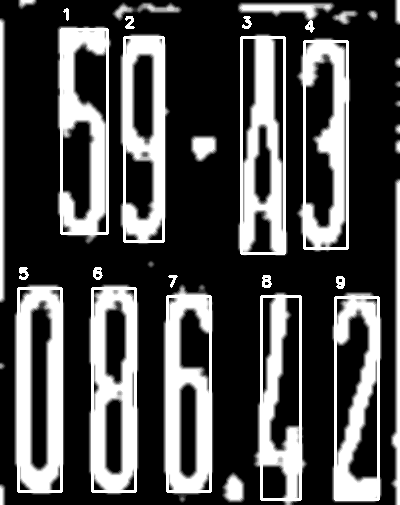

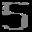

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
5


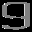

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
9


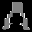

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
A


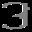

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
3


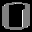

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
0


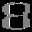

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
N


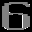

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
6


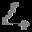

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
4


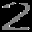

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
2
Thời gian: 1.3010175228118896
Biển số nhận diện được: 59A30N642


In [133]:
# Tạo đối tượng nhận diện biển số
recognizer = LicensePlateRecognizer(model_cnn, label_dict)

# Đọc ảnh và cắt các ký tự từ ảnh
img_path = "/content/drive/MyDrive/ThiGiacMay/btl/test/cropped_images_test/original_0430_05970_b_jpg.rf.e1d40139749c7c9e418faf9936c68336_cropped_0.jpg"
img = cv2.imread(img_path)
candidates = recognizer.cut_label(img)

# Nhận diện biển số
start_time = time.time()
result = recognizer.predict_cnn(candidates)
end_time = time.time()
print(f"Thời gian: {end_time - start_time}")
print(f"Biển số nhận diện được: {result}")

In [134]:
import torch
model_tinycnn_path = '/content/tinycnn_full_model.pth'
model_tinycnn = torch.load(model_tinycnn_path, weights_only=False)
print(model_tinycnn)

TinyCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=2048, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=31, bias=True)
)


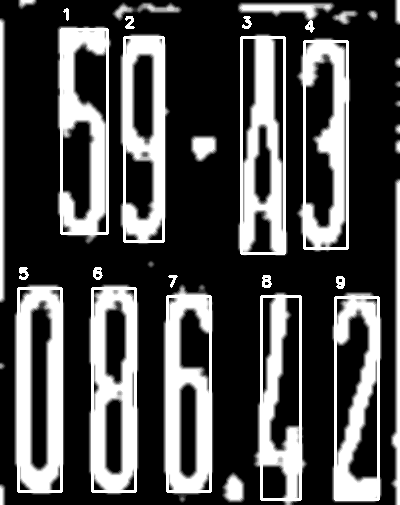

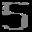

5


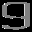

9


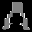

A


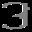

3


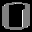

0


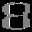

8


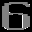

6


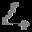

4


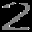

2
Thời gian: 0.04283642768859863
Biển số nhận diện được: 59A308642


In [135]:
# Tạo đối tượng nhận diện biển số
recognizer = LicensePlateRecognizer(model_tinycnn, label_dict)

# Đọc ảnh và cắt các ký tự từ ảnh
img_path = "/content/drive/MyDrive/ThiGiacMay/btl/test/cropped_images_test/original_0430_05970_b_jpg.rf.e1d40139749c7c9e418faf9936c68336_cropped_0.jpg"
img = cv2.imread(img_path)
candidates = recognizer.cut_label(img)

# Nhận diện biển số
start_time = time.time()
result = recognizer.predict_tinycnn(candidates)
end_time = time.time()
print(f"Thời gian: {end_time - start_time}")
print(f"Biển số nhận diện được: {result}")

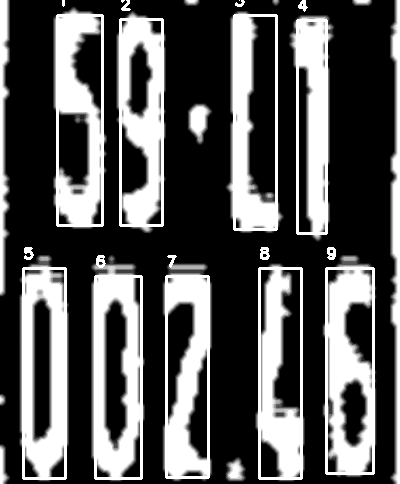

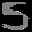

5


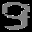

9


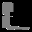

L


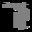

1


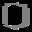

0


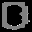

D


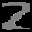

2


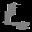

4


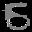

6
Thời gian: 0.07492685317993164
Biển số nhận diện được: 59L10D246


In [136]:
# Tạo đối tượng nhận diện biển số
recognizer = LicensePlateRecognizer(model_tinycnn, label_dict)

candidates = recognizer.cut_label(b)

# Nhận diện biển số
start_time = time.time()
result = recognizer.predict_tinycnn(candidates)
end_time = time.time()
print(f"Thời gian: {end_time - start_time}")
print(f"Biển số nhận diện được: {result}")

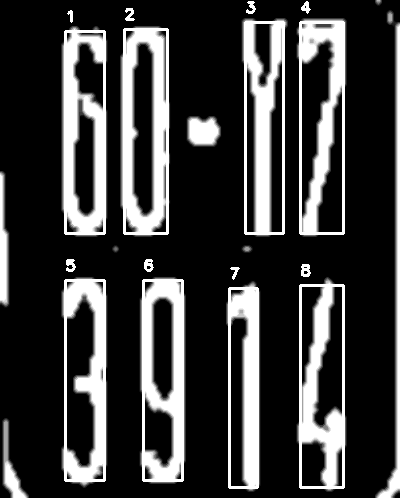

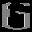

U


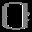

0


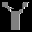

Y


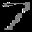

7


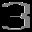

3


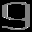

9


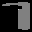

7


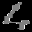

4
Thời gian: 0.052037715911865234
Biển số nhận diện được: U0Y73974


In [137]:
image_test = cv2.imread("/content/image_test.jpg")

candidates = recognizer.cut_label(image_test)

# Nhận diện biển số
start_time = time.time()
result = recognizer.predict_tinycnn(candidates)
end_time = time.time()
print(f"Thời gian: {end_time - start_time}")
print(f"Biển số nhận diện được: {result}")

Không phát hiện được đường thẳng.
Ảnh có nhiễu, cần giảm nhiễu.


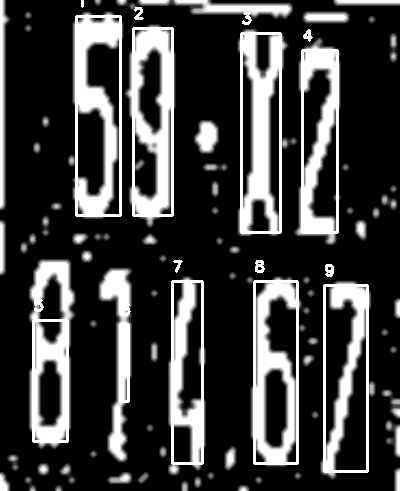

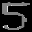

5


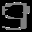

9


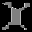

X


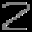

2


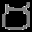

U


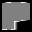

M


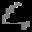

4


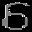

6


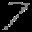

Z
Thời gian: 0.057353973388671875
Biển số nhận diện được: 59X2UM46Z


In [138]:
# img_contrasted
img_contrasted = preprocess_image(img_contrasted)
candidates = recognizer.cut_label(img_contrasted)

# Nhận diện biển số
start_time = time.time()
result = recognizer.predict_tinycnn(candidates)
end_time = time.time()
print(f"Thời gian: {end_time - start_time}")
print(f"Biển số nhận diện được: {result}")

## EasyOCR

In [ ]:
!pip install easyocr

In [129]:
import easyocr
reader = easyocr.Reader(['en'], gpu=False)
allowlist='0123456789ABCDEFGHKLMNPRSTUVXYZ'

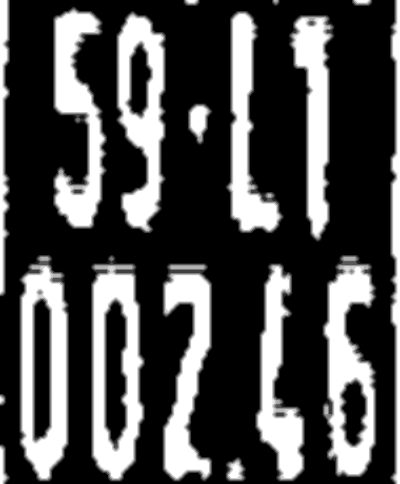

Detected text: 59L, Confidence: 29.586589328499567%
Detected text: 002L6, Confidence: 45.66026610061117%


In [130]:
img_easyocr = recognizer.prepro_img_forcut(b)
cv2_imshow(img_easyocr)
results = reader.readtext(img_easyocr, allowlist=allowlist)
for item in results:
    print(f"Detected text: {item[1]}, Confidence: {item[2] * 100}%")

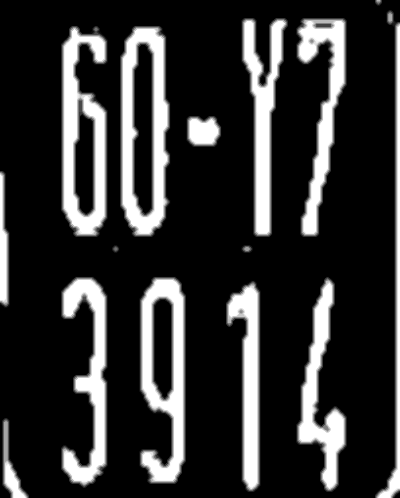

Detected text: 6UH87, Confidence: 7.457177442097593%
Detected text: 39141, Confidence: 80.80264493197585%


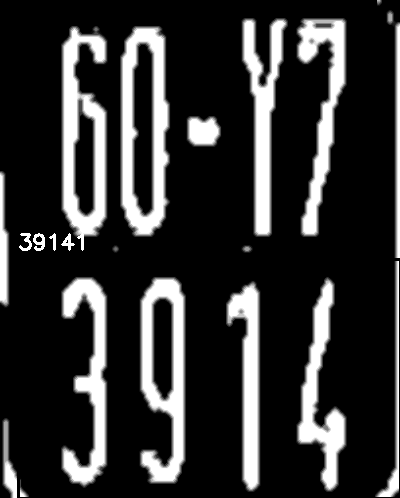

In [131]:
# Tiền xử lý ảnh
img_easyocr = recognizer.prepro_img_forcut(image_test)
cv2_imshow(img_easyocr)

# Phát hiện văn bản
results = reader.readtext(img_easyocr, allowlist=allowlist)

# Vẽ bounding box và in văn bản
for item in results:
    # item[0] là các tọa độ của bounding box
    # item[1] là văn bản được nhận diện
    # item[2] là độ chính xác (confidence)

    # Vẽ bounding box
    box = item[0]  # Tọa độ bounding box
    top_left = tuple(int(coord) for coord in box[0])  # Lấy tọa độ điểm trên cùng bên trái
    bottom_right = tuple(int(coord) for coord in box[2])  # Lấy tọa độ điểm dưới cùng bên phải
    cv2.rectangle(img_easyocr, top_left, bottom_right, (0, 255, 0), 2)  # Vẽ hình chữ nhật (màu xanh lá)

    # Ghi văn bản lên ảnh
    text = item[1]
    cv2.putText(img_easyocr, text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

    # In kết quả
    print(f"Detected text: {text}, Confidence: {item[2] * 100}%")

# Hiển thị ảnh với bounding box
cv2_imshow(img_easyocr)